In [48]:
import pandas as pd
import numpy as np

In [44]:
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [8]:
df = pd.read_csv("/drive/data/canada_per_capita_income.csv")
df_og = df

In [9]:
df = df.rename(columns = {"per capita income (US$)":"us_income_per_capita"})

# Predict the value of the Canadian Income Per Capita in 2025

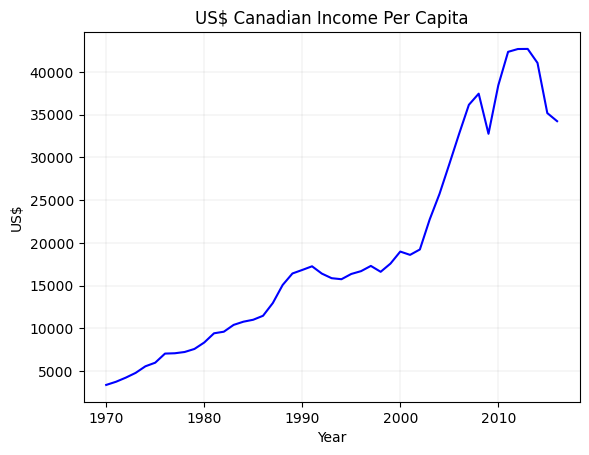

In [21]:
# Visualizing the trend of the dataset
plt.plot(df.year,df.us_income_per_capita,linestyle='-',color='blue')
plt.xlabel('Year')
plt.ylabel('US$')
plt.grid(which='both',linewidth=0.1,linestyle='-',color = 'grey')
plt.title('US$ Canadian Income Per Capita')
plt.show()

**There are no null values in the dataset**

This is true because the sum of not null values in the dataset matches the _count_ function above. In mathematical words, the total number of rows matches the total number of non-null rows

In [30]:
print(sum(df.year.notnull()))
print(sum(df.us_income_per_capita.notnull()))

47
47


**There are no duplicated values in the dataset**

This is true because the count of distinct years in the dataset matches the _count_ function above.

In [37]:
len(df.year.unique())

47

**Mean of US income per capita > 2nd Quartile**

This means that the dataset contains some positive outliers, skewing the distribution towards the right.

In [25]:
#Descriptive statistics to check for outliers or other issues

df.describe()

,year,us_income_per_capita
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


**Box plot does not show any outliers**

We can continue with our current dataset as no outliers are shown by the boxplot

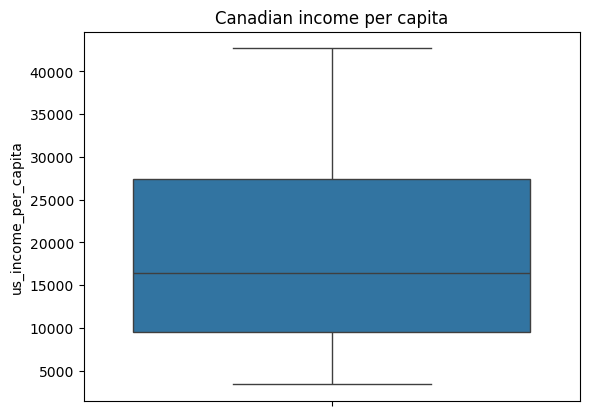

In [47]:
sns.boxplot(df.us_income_per_capita)
plt.title('Canadian income per capita')
plt.show()

In [64]:
# Defining X and Y
x = np.array(df.year).reshape(-1,1)
y = np.array(df.us_income_per_capita)

# Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 104, test_size = 0.25, shuffle = True)

# Define the model (linear regression)
model = LinearRegression()

# Fit the train data and returns its score
model.fit(x_train,y_train)
print(

LinearRegression()

In [128]:
y_predict_test = model.predict(np.array(x_test).reshape(-1,1))
print(f"R-squared (rounded at 5 decimals): {round(model.score(x_train,y_train),5)}")

R-squared (rounded at 5 decimals): 0.89499


In [131]:
# Exercise
print(f"2023 Canadian GDP per capita is {model.predict(np.array([2023]).reshape(-1,1))}")

2023 Canadian GDP per capita is [43774.08932009]


With a R-Squared of 0.89, our regression line fits well the training dataset. The next step is to assess the **Average Error**

**First Test: our prediction could be wrong on average of about 2370 euros**

The average prediction error between _Income Prediction_ vs. _Income Actuals_ is appx. 2370 euros, which means that on average our prediction could be wrong of plus/minus 2370 euros.
Considering an average income per capita of 18k, **this can be considered reliable**.

In [89]:
print(mean_absolute_error(y_test,y_predict_test))

2336.0523247215465


**Second test: our model is underestimating the true value of the Canadian GDP per capita**

Following the assumption of the linear regression, mean of residuals should tend to 0.

However, this model has a residuals mean of 512 which means our estimator is underestimating the real value of the Canadian GDP per capita.

The mean of residuals is 512.1309275965176


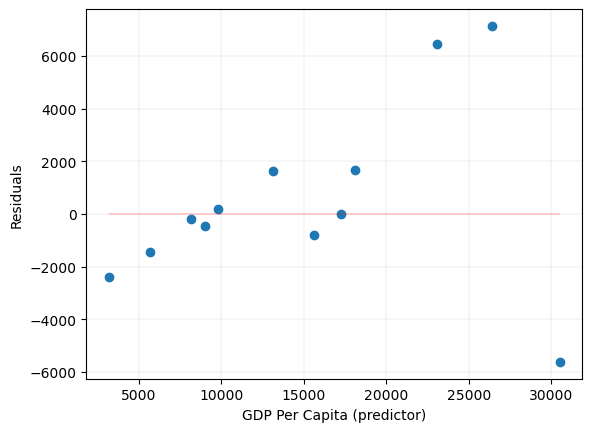

In [117]:
# Calculate residuals to check homoschedasticity

residuals = y_predict_test - y_test
print(f"The mean of residuals is {np.mean(residuals)}")

residuals.mean()
plt.scatter(y_predict_test,residuals)
plt.plot([min(y_predict_test),max(y_predict_test)],[0,0],linestyle='-',linewidth=0.25,color='red')
plt.xlabel('GDP Per Capita (predictor)')
plt.ylabel('Residuals')
plt.grid(which='both',linestyle='-',linewidth=0.1,color='grey')
plt.show()